# Lab 2. Exposure error.
The objectives of this lab exercise are
<p><b>1. to quantify the effects of radiation error on temperature measurements, and</b></p>
<p><b>2. to quantify the effect of adding a simple radiation shield in sunny conditions.</b></p>

### <font color = "blue">Hypothesis 1: When the Kestrel thermistor is exposed to the sun, the Kestrel's temperature measurements will be too high (relative to KLAF's readings).</font>

### <font color = "blue">Hypothesis 2: When the Kestrel thermistor is exposed to the sun and a simple radiation shield is used to block it, the Kestrel's temperature measurements will still be too high (relative to KLAF), but not as high as when the radiation shield is absent.</font>

## Questions to consider:

<B>What do your results suggest about where temperature sensors should be placed?</B>

<B>What do your results suggest about the use of radiation shields for mitigating radiation-induced temperature error?</b>

First let's import the needed libraries:

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

We've already used Python to create a Pandas Dataframe from a text file. This time, we'll create one element by element, using the data you collected in your worksheet. 

## In the cell below, replace the values shown with the ones from your lab worksheet. 

Don't change any of the curly braces, colons, or commas. These are needed in order for the DataFrame to parse correctly. Each line must contain the same number of entries, or your DataFrame may not parse correctly.

In the 'Rad. Shield' line, enter True if the radiation shield was used, and False if it was not.

In [7]:
d = {'Shady-Sunny': ['Shady', 'Shady', 'Sunny', 'Sunny', 'Sunny', 'Sunny'], # Case sensitive
     'Rad. Shield': [False, False, False, False, True, True], # True = Shield used, False = Shield not used
     'Kestrel Temp F': [71.0, 70.9, 78.1, 80.1, 76.1, 76.8], 
     'KLAF Temp F': [61.0, 61.0, 70.0, 70.5, 71.0, 71.5]}
d = {'Shady-Sunny': ['Shady', 'Shady', 'Shady', 'Shady', 'Shady', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny'], # Case sensitive
     'Rad. Shield': [False, False, False, False, False, False, True, False, True, False, True, False, True], # True = Shield used, False = Shield not used
     'Kestrel Temp F': [68.8, 68.6, 70.5, 70.9, 68.6, 73.7, 73.3, 73.4, 73.2, 76.5, 76.3, 79.4, 79.1],
     'KLAF Temp F': [61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0]}
df = pd.DataFrame(data = d)
df # Print out the contents of the DataFrame named "df"

,Shady-Sunny,Rad. Shield,Kestrel Temp F,KLAF Temp F
0,Shady,False,68.8,61.0
1,Shady,False,68.6,61.0
2,Shady,False,70.5,61.0
3,Shady,False,70.9,61.0
4,Shady,False,68.6,61.0
5,Sunny,False,73.7,61.0
6,Sunny,True,73.3,61.0
7,Sunny,False,73.4,61.0
8,Sunny,True,73.2,61.0
9,Sunny,False,76.5,61.0


First, we can plot the time series of the Kestrel and KLAF temperatures:

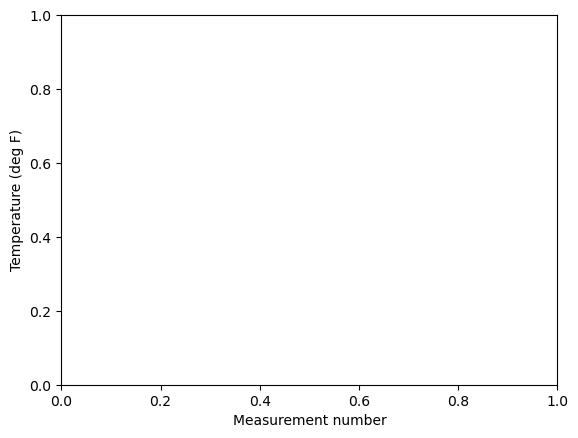

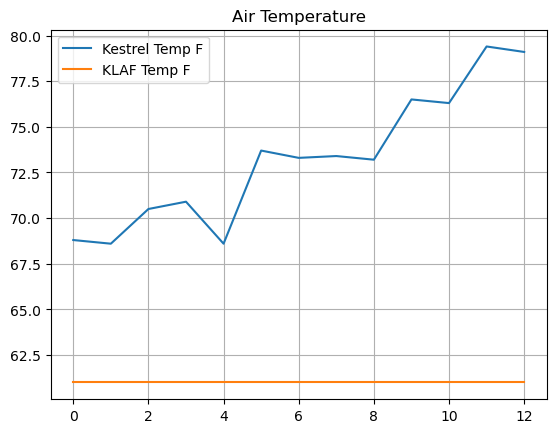

Text(0, 0.5, 'Temperature (deg F)')

In [18]:
df.plot(y=['Kestrel Temp F', 'KLAF Temp F'])
plt.grid()
plt.title('Air Temperature')
plt.show()
plt.xlabel("Measurement number")
plt.ylabel("Temperature (deg F)")

A conclusion we can immediately draw from this image is that <B>all</b> the Kestrel measurements are too high relative to KLAF, not just the sunny ones.

Next, to test Hypothesis 1, let's first make box-and-whisker plots of Sunny and Shady data:

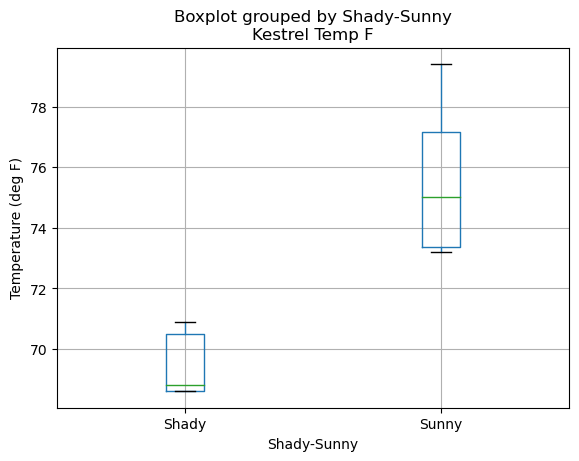

In [4]:
df.boxplot("Kestrel Temp F", by = "Shady-Sunny")
plt.ylabel("Temperature (deg F)")
plt.show()

This does indeed suggest that the "sunny" measurements are very warm relative to the KLAF temperatures. However, they also exhibit a lot of spread, because they consist of a mixture of measurements with and without the radiation shield. To separate out the measurements with the radiation shield from those without, we add another argument to boxplot():

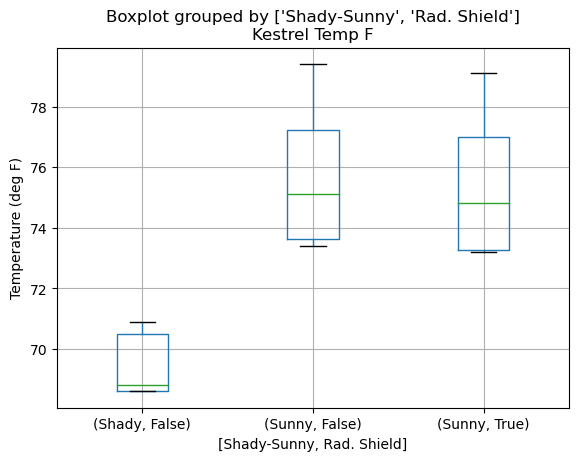

In [5]:
df.boxplot("Kestrel Temp F", by = ["Shady-Sunny","Rad. Shield"])
plt.ylabel("Temperature (deg F)")
plt.show()

Boxplot() is now grouping the data in two ways: Sunny vs. shady, and whether there was a radiation shield or not.
<p>(Shady, False) = Kestrel was in the shade with no radiation shield</p>
<p>(Sunny, False) = Kestrel was in the sun with no radiation shield</p>
<p>(Sunny, True) = Kestrel was in the sun with a radiation shield</p>

Note that there is no (Shady, True) box-and-whisker because we didn't take any measurements in the shade with the radiation shield on. If this combination of data isn't present, Pandas / Matplotlib won't plot it.

## While the plot seems to suggest that the radiation shield helped, the next question is, "How much?"
The temperature outside was changing throughout the experiment. We need to quantify our measurements relative to KLAF (which we'll treat as "Truth").

Let's add a new column to the DataFrame, substracting KLAF from Kestrel temperatures to get a relative difference:

In [6]:
df['Kestrel-KLAF'] = df['Kestrel Temp F'] - df['KLAF Temp F']
df  # Print out the (new) contents of the dataframe

,Shady-Sunny,Rad. Shield,Kestrel Temp F,KLAF Temp F,Kestrel-KLAF
0,Shady,False,68.8,61.0,7.8
1,Shady,False,68.6,61.0,7.6
2,Shady,False,70.5,61.0,9.5
3,Shady,False,70.9,61.0,9.9
4,Shady,False,68.6,61.0,7.6
5,Sunny,False,73.7,61.0,12.7
6,Sunny,True,73.3,61.0,12.3
7,Sunny,False,73.4,61.0,12.4
8,Sunny,True,73.2,61.0,12.2
9,Sunny,False,76.5,61.0,15.5


Now we can make a boxplot based on these differences:

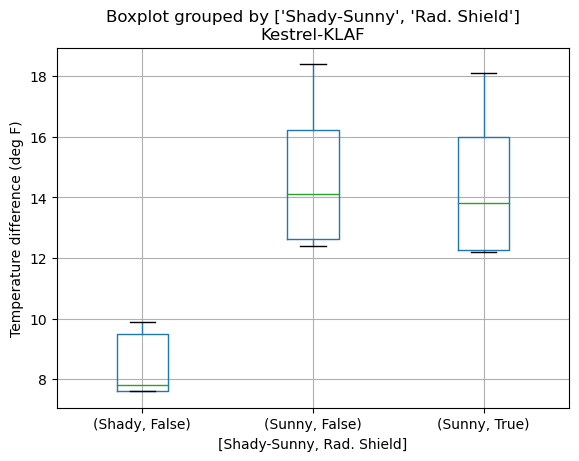

In [7]:
df.boxplot("Kestrel-KLAF", by = ["Shady-Sunny","Rad. Shield"])
plt.ylabel("Temperature difference (deg F)")
plt.show()

Let's calculate the means for these differences:

In [8]:
df.groupby(["Shady-Sunny","Rad. Shield"]).mean()

Kestrel Temp F  KLAF Temp F  Kestrel-KLAF
Shady-Sunny Rad. Shield                                           
Shady       False                69.480         61.0         8.480
Sunny       False                75.750         61.0        14.750
            True                 75.475         61.0        14.475

### Translation:

Even shady measurements are about 1.7 deg F too high.

Sunny measurements are about 8.9 deg F too high and exhibit large variability.

The addition of the radiation shield cuts this high bias down considerably, from 8.9 deg F to 5.2 deg F. 

<b>But it's still awfully high - enough to introduce substantial errors in analyses or forecasts.</b>

# <font color = "red">Do not be discouraged if your results don't match mine. My data are 100% fabricated! Report truthfully, even if your results are counterintuitive.</font>
Speculate on why the hypothesis might be incorrect, or suggest a reformulation.
## Use these plots in your lab report. 
You may not need all of them! Only include the ones that lead you to the conclusion you reached.